## AI Early Warning System For Students At Risk

## Problem Statement :
Educational institutions often struggle to identify students who are likely to underperform or fail before final examinations. By the time poor performance is detected, opportunities for effective intervention are greatly reduced, leading to higher dropout rates, diminished student confidence, and lower institutional performance metrics.

The challenge is to develop an AI-powered early warning system that can analyze academic records, behavioral factors, and socio-economic indicators to accurately predict whether a student is “At Risk” of poor performance. The system should prioritize early detection with high recall, ensuring that struggling students are identified with minimal false negatives, enabling educators and counselors to provide timely academic or personal support.

This solution must be explainable, offering clear insights into the factors contributing to risk predictions, and deployable via a user-friendly dashboard to assist teachers, school administrators, and parents in making informed decisions that enhance student success.

In [2]:
# importing important libraries and model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
import shap
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Data loading
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# statistical information about the data
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# Label Encoding for cateogerical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df['pass'] = (df['G3'] >= 10).astype(int)


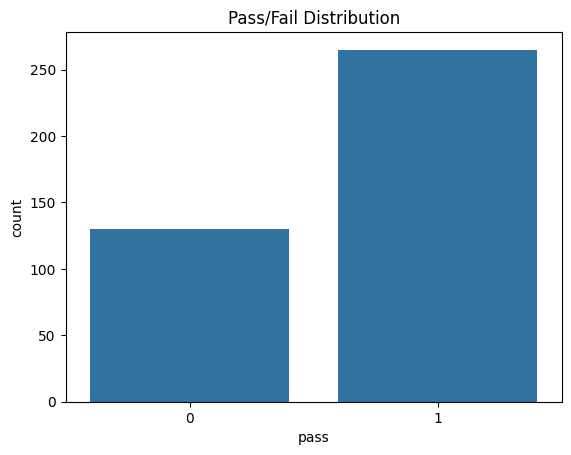

In [7]:
# Checking distribution of pass and fail students
sns.countplot(x='pass', data=df)
plt.title('Pass/Fail Distribution')
plt.show()


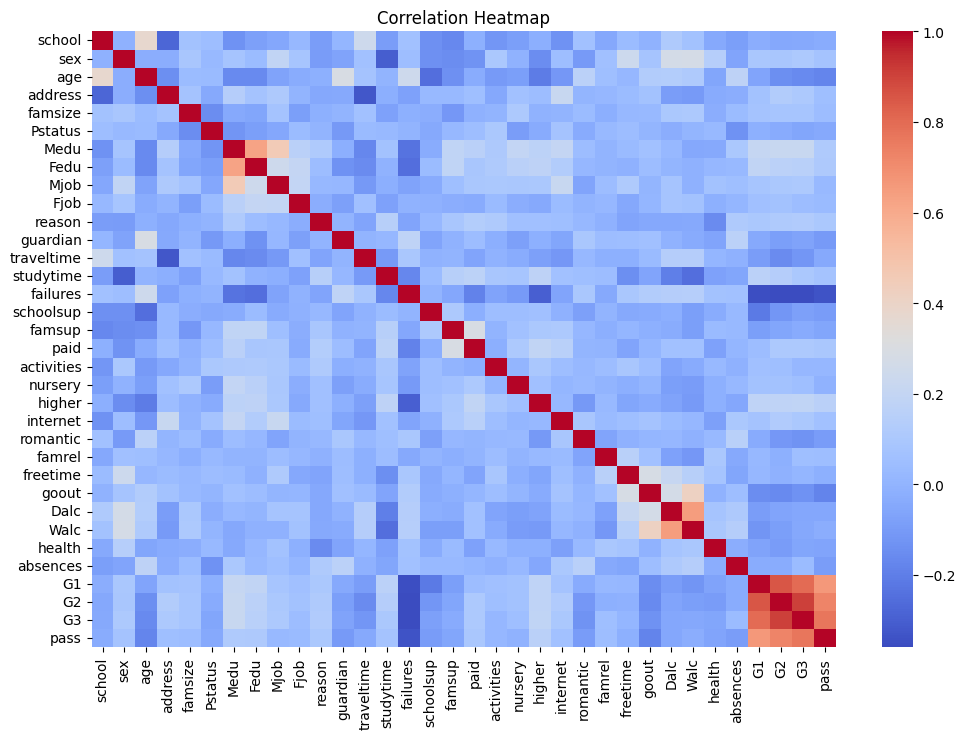

In [8]:
# coorelation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


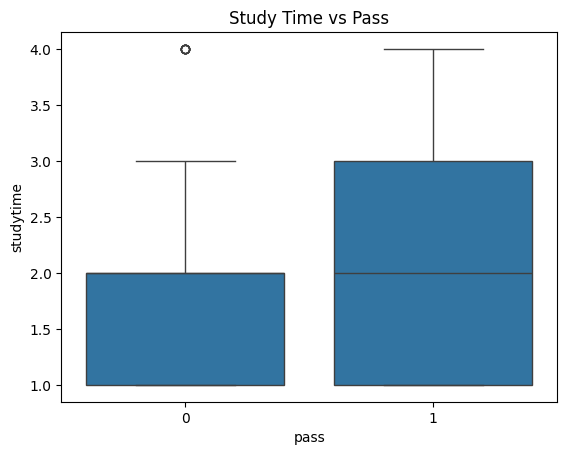

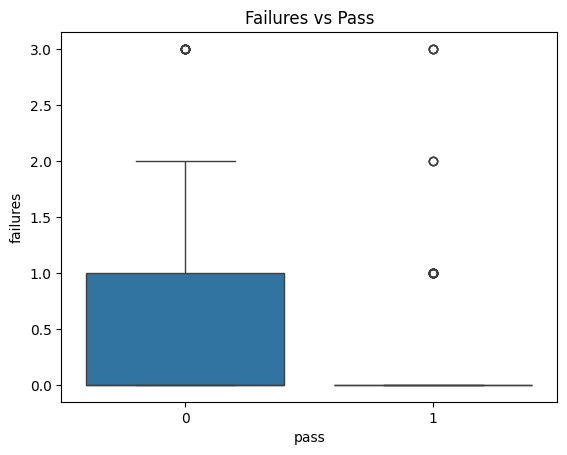

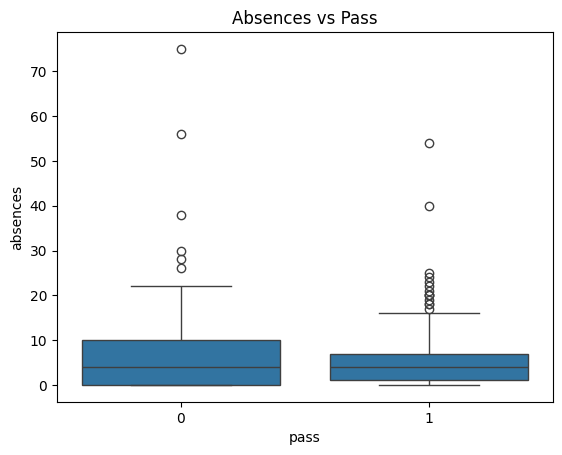

In [9]:
sns.boxplot(x='pass', y='studytime', data=df)
plt.title('Study Time vs Pass')
plt.show()

sns.boxplot(x='pass', y='failures', data=df)
plt.title('Failures vs Pass')
plt.show()

sns.boxplot(x='pass', y='absences', data=df)
plt.title('Absences vs Pass')
plt.show()


## Model Training

In [16]:
X = df.drop(['G3', 'pass'], axis=1)
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Logistic Regression

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_acc)


Logistic Regression Accuracy: 0.9367088607594937


In [20]:
# Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.9113924050632911


In [22]:
# Support Vector Machine

In [23]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
print("SVM Accuracy:", svc_acc)


SVM Accuracy: 0.8860759493670886


In [24]:
# K nearest Neighbours

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.8987341772151899


In [26]:
# Hyperparameter tuning for the best model

In [27]:
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
best_rf_acc = accuracy_score(y_test, y_pred_best_rf)
print("Best RF Accuracy:", best_rf_acc)


Best RF Accuracy: 0.8987341772151899


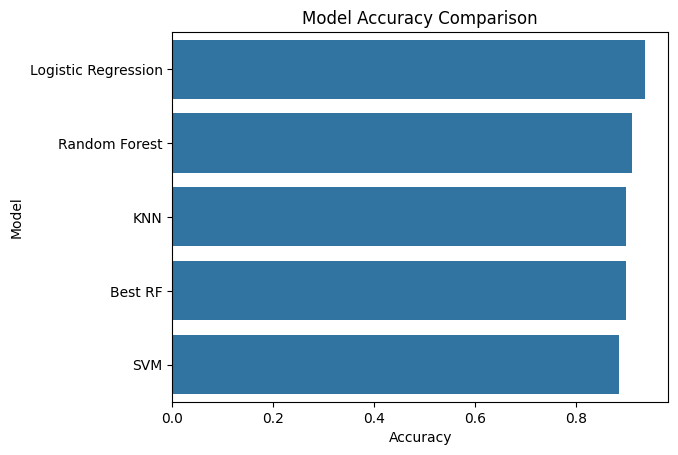

                 Model  Accuracy
0  Logistic Regression  0.936709
1        Random Forest  0.911392
3                  KNN  0.898734
4              Best RF  0.898734
2                  SVM  0.886076


In [28]:
# Model comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Best RF'],
    'Accuracy': [lr_acc, rf_acc, svc_acc, knn_acc, best_rf_acc]
})
results.sort_values(by='Accuracy', ascending=False, inplace=True)
sns.barplot(x='Accuracy', y='Model', data=results)
plt.title('Model Accuracy Comparison')
plt.show()
print(results)


In [29]:
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


[[24  3]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.94      0.90      0.92        52

    accuracy                           0.90        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.90      0.90      0.90        79



In [30]:
from sklearn.model_selection import cross_val_score

# Logistic Regression CV Score
cv_scores_lr = cross_val_score(logreg, X, y, cv=5)
print("Logistic Regression CV Accuracy: ", np.mean(cv_scores_lr))

# Random Forest CV Score
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy: ", np.mean(cv_scores_rf))

# SVM CV Score
cv_scores_svc = cross_val_score(svc, X, y, cv=5)
print("SVM CV Accuracy: ", np.mean(cv_scores_svc))

# KNN CV Score
cv_scores_knn = cross_val_score(knn, X, y, cv=5)
print("KNN CV Accuracy: ", np.mean(cv_scores_knn))

# Best RF (GridSearchCV gives best_rf already)
cv_scores_best_rf = cross_val_score(best_rf, X, y, cv=5)
print("Best RF CV Accuracy: ", np.mean(cv_scores_best_rf))


Logistic Regression CV Accuracy:  0.911392405063291
Random Forest CV Accuracy:  0.9063291139240505
SVM CV Accuracy:  0.8886075949367089
KNN CV Accuracy:  0.8734177215189873
Best RF CV Accuracy:  0.9088607594936707


## Insights :
In this dataset, Logistic Regression outperformed all other classifiers with an accuracy of 93.67%.
This suggests that the decision boundary between students who pass or fail is largely linearly separable.
Random Forest and KNN also gave strong performance, but did not surpass logistic regression, 
 likely due to the small dataset size and the linear nature of the underlying feature relationships."